##Importing Lib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

##Importing the dataset


In [ ]:
dataset = pd.read_csv('Bhopal_Crowd_Data.csv')
X = dataset.iloc[:,2:6].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X[0])

[2 'Mon' 'Clear' 'A']


In [ ]:
print(y)

#Analysis

##Visualize the distribution of Crowd Density by Zone

In [ ]:
import seaborn as sns

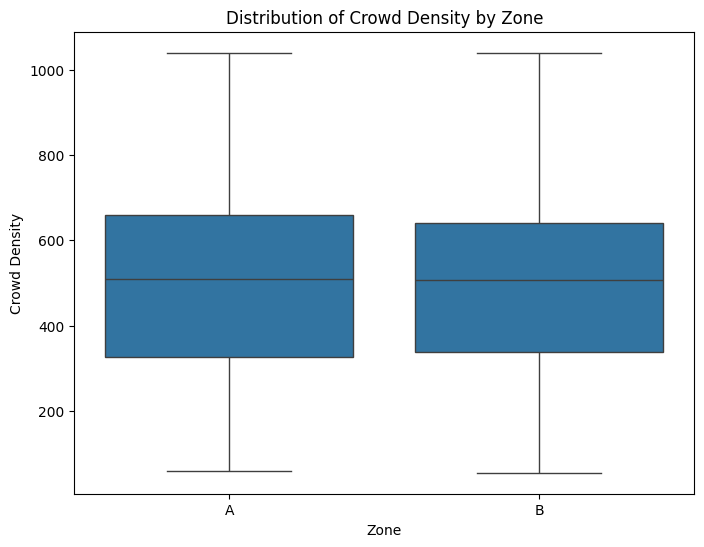

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Zone', y='Crowd Density', data=dataset)
plt.title('Distribution of Crowd Density by Zone')
plt.xlabel('Zone')
plt.ylabel('Crowd Density')
plt.show()

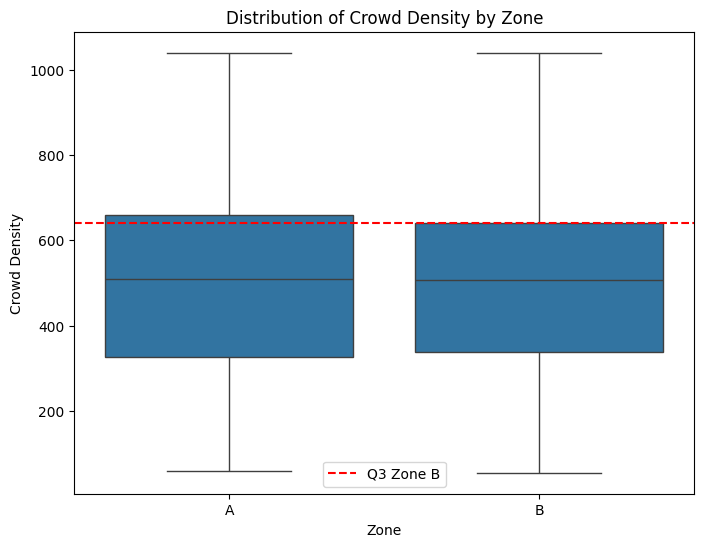

In [ ]:

q3_zone_b = dataset[dataset['Zone'] == 'B']['Crowd Density'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Zone', y='Crowd Density', data=dataset)
plt.title('Distribution of Crowd Density by Zone')
plt.xlabel('Zone')
plt.ylabel('Crowd Density')

plt.axhline(q3_zone_b, color='red', linestyle='--', label='Q3 Zone B')
plt.legend()

plt.show()


##Visualize the relationship between Crowd Density and Weather

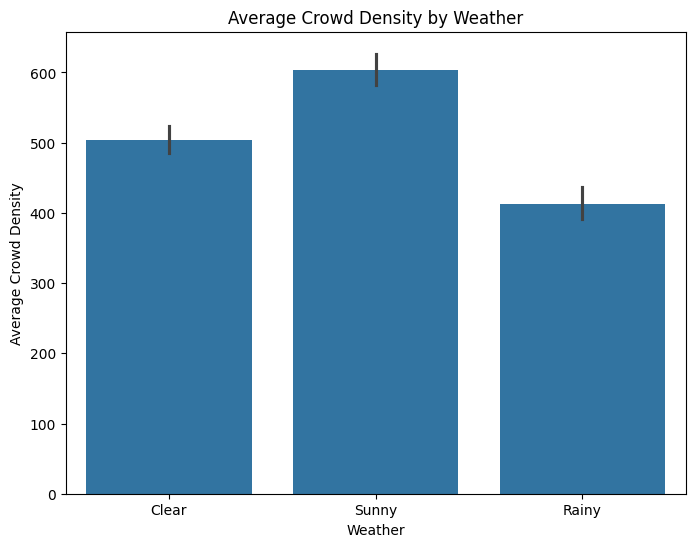

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Weather', y='Crowd Density', data=dataset)
plt.title('Average Crowd Density by Weather')
plt.xlabel('Weather')
plt.ylabel('Average Crowd Density')
plt.show()

## Visualize the relationship between Hour Slot and Crowd Density

In [ ]:
overall_mean_density = dataset['Crowd Density'].mean()

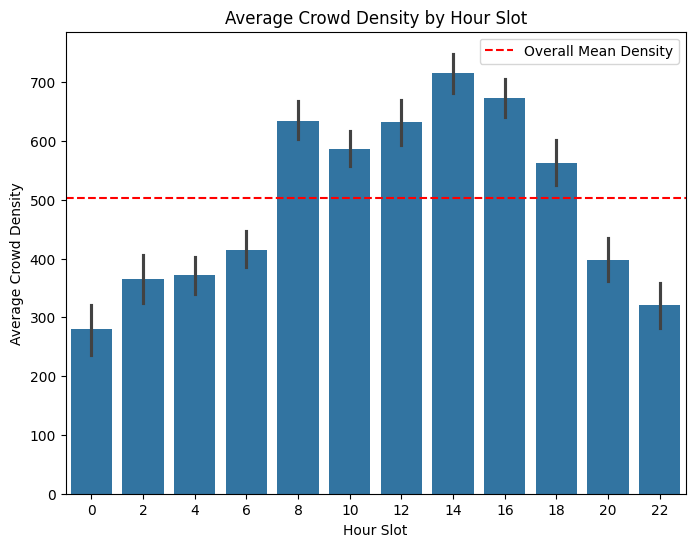

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Hour Slot', y='Crowd Density', data=dataset)
plt.title('Average Crowd Density by Hour Slot')
plt.xlabel('Hour Slot')
plt.ylabel('Average Crowd Density')
plt.axhline(overall_mean_density, color='red', linestyle='--', label='Overall Mean Density')
plt.legend()
plt.show()

##  Visualize the relationship between Day and Crowd Density

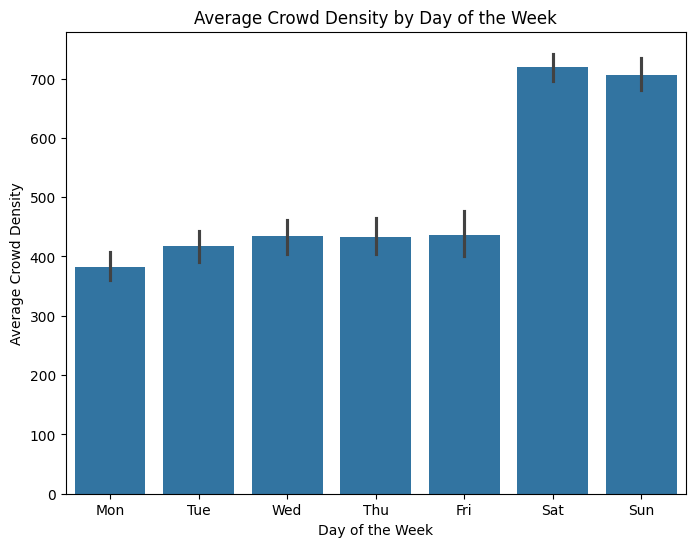

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Day', y='Crowd Density', data=dataset)
plt.title('Average Crowd Density by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Crowd Density')
plt.show()

##Encoding categorical data


##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])

In [ ]:
print(X[0])

[2 'Mon' 'Clear' 0]


## Encoding Day and Weather

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [1,2])], remainder='passthrough')
ct.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [1, 2])])

In [ ]:
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[0])

[0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2 0]


##Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

#Models

## SVM

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

SVR()

In [ ]:
svm_pred = svm.predict(X_test);

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, svm_pred)

0.126439998786536

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec = DecisionTreeRegressor(random_state = 0)
dec.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dec_pred = dec.predict(X_test)

In [ ]:
r2_score(y_test, dec_pred)

0.8197154323892357

## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
mreg = LinearRegression()
mreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
mreg_pred = mreg.predict(X_test)

In [ ]:
r2_score(y_test, mreg_pred)

0.6377686953686892

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=None,  n_estimators = 100, min_samples_split=2, min_samples_leaf=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

## Graph View

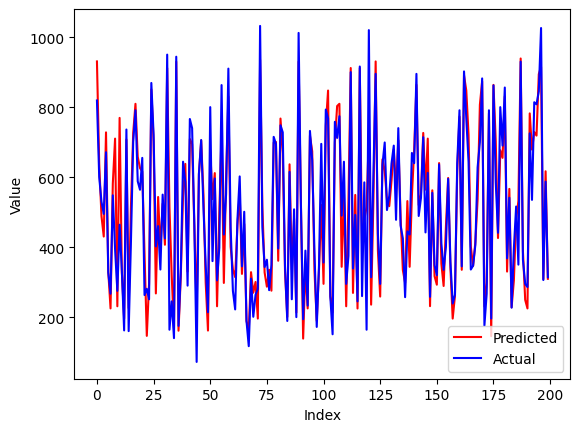

In [ ]:
plt.plot(y_pred, color='red', label='Predicted')
plt.plot(y_test, color='blue', label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()

##Expanded Graph

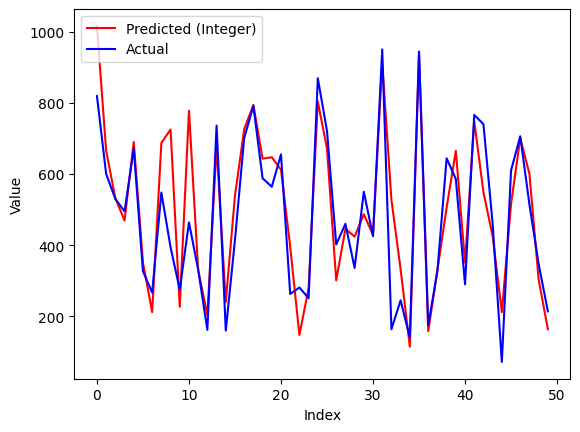

In [ ]:
# Convert float values in y_pred to integers
y_pred_int = y_pred.astype(int)

# Plot the first 50 rows of y_pred_int and y_test
plt.plot(y_pred_int[:50], color='red', label='Predicted (Integer)')
plt.plot(y_test[:50], color='blue', label='Actual')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()

# Testing and tuning hyperparameters

##Grid Search for best parameters


In [ ]:
# Define the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Create the grid search object
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=param_grid,
                           scoring='r2',  # Use r-squared score for regression
                           cv=10,
                           n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best r-squared score and best parameters
best_r2_score = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best R-squared Score:", best_r2_score)
print("Best Parameters:", best_parameters)

Best R-squared Score: 0.8889471288652757
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


## K-Folding

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X = X_train, y=y_train, cv=10)
print("Accuracies-Mean: " + str(round(accuracies.mean() * 100, 2)) + "%")

Accuracies-Mean: 88.89%


# Pickle

In [ ]:
import pickle

In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

In [ ]:
with open('label.pkl', 'wb') as file:
    pickle.dump(le, file)

In [ ]:
with open('ct.pkl', 'wb') as file:
    pickle.dump(ct, file)

#Cheking Prediction

In [ ]:
input_data = np.array([[2, 'Mon', 'Clear', 'A']])

In [ ]:
import sklearn

In [ ]:
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.2.2


In [ ]:
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Load the one-hot encoder
with open('ct.pkl', 'rb') as f:
    one_hot_encoder = pickle.load(f)

In [ ]:
# Load the label encoder
with open('label.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [ ]:
input_data[:, 3] = label_encoder.transform(input_data[:, 3])

In [ ]:
print(input_data)

[['2' 'Mon' 'Clear' '0']]


In [ ]:
input_data = np.array(one_hot_encoder.transform(input_data))

In [ ]:
print(input_data)

[['0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0' '2' '0']]


In [ ]:
prediction = model.predict(input_data)
print("Predicted Crowd Density:", prediction)

Predicted Crowd Density: [296.04790764]
